In [1]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

documents = ['This is the first sentence.',
             'This one is the second sentence.',
             'And this is the third one.',
             'Is this the first sentence?']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(documents)

# X.torray() is BoW
print(X.toarray())

[[0 1 1 0 0 1 1 0 1]
 [0 0 1 1 1 1 1 0 1]
 [1 0 1 1 0 0 1 1 1]
 [0 1 1 0 0 1 1 0 1]]


In [24]:
# Get the unique words
print(vectorizer.get_feature_names())
# the above array represents the number of times each feature name
# appears in the sentence

['and', 'first', 'is', 'one', 'second', 'sentence', 'the', 'third', 'this']


In [25]:
# supervised learning vs unsupervised learning
#
# supervised learning includes linear regression, logistic regression, support vector machine
# this is called supervised because it infers a function from labeled training data 
# consisting of a set of training examples
#
# unsupervised learning includes principal component analysis and clustering
# unsupervised learning attempts to find previously unknown patterns in data, without preexisting labels

In [18]:
from figures import plot_kmeans_interactive

plot_kmeans_interactive()

interactive(children=(IntSlider(value=0, description='frame', max=50), Dropdown(description='n_clusters', opti…

<function figures.plot_kmeans_interactive.<locals>._kmeans_step(frame=0, n_clusters=4)>

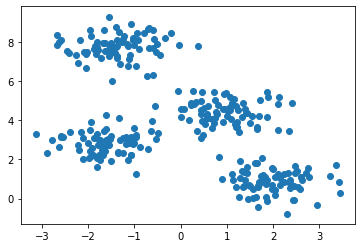

In [19]:
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=300, centers=4,
                          random_state=0, cluster_std=0.60)

plt.scatter(X[:, 0], X[:, 1])

In [20]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=4)
km.fit(X)
print(km.cluster_centers_)

[[ 1.98258281  0.86771314]
 [-1.58438467  2.83081263]
 [ 0.94973532  4.41906906]
 [-1.37324398  7.75368871]]


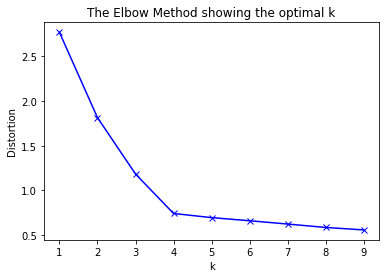

In [21]:
import numpy as np
from scipy.spatial import distance

distortions = []
K = range(1, 10)
for k in K:
    km = KMeans(n_clusters=k)
    km.fit(X)
    distortions.append(sum(np.min(distance.cdist(X, km.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [28]:
def optimal(dist_arr):
    best_delta = 0
    optimal = 0
    for index, val in enumerate(dist_arr):
        k = index + 1
        delta_slope = 0
        if index > 0 and index < len(dist_arr) - 1:
            prev_slope = dist_arr[index-1] - dist_arr[index]
            next_slope = dist_arr[index] - dist_arr[index+1]
            delta_slope = abs(prev_slope - next_slope)
        if delta_slope > best_delta:
            best_delta = delta_slope
            optimal = k
    return optimal

In [29]:
optimal(distortions)

4

In [30]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

documents = ["This little kitty came to play when I was eating at a restaurant.",
             "Merley has the best squooshy kitten belly.",
             "Google Translate app is incredible.",
             "If you open 100 tab in google you get a smiley face.",
             "Best cat photo I've ever taken.",
             "Climbing ninja cat.",
             "Impressed with google map feedback.",
             "Key promoter extension for Google Chrome."]

In [43]:
# vec = CountVectorizer()
vec = TfidfVectorizer(stop_words='english')
J = vec.fit_transform(documents)
print(J.toarray()) # this matrix is called a "bag of words"

[[0.         0.         0.         0.         0.40824829 0.
  0.         0.         0.40824829 0.         0.         0.
  0.         0.         0.         0.         0.         0.40824829
  0.40824829 0.         0.         0.         0.         0.
  0.40824829 0.         0.40824829 0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.46114911 0.38647895 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.46114911 0.
  0.         0.         0.46114911 0.         0.         0.
  0.         0.         0.         0.         0.46114911 0.
  0.         0.         0.        ]
 [0.         0.54216208 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.34377441 0.         0.54216208 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.54216

In [44]:
print(vec.get_feature_names())

['100', 'app', 'belly', 'best', 'came', 'cat', 'chrome', 'climbing', 'eating', 'extension', 'face', 'feedback', 'google', 'impressed', 'incredible', 'key', 'kitten', 'kitty', 'little', 'map', 'merley', 'ninja', 'open', 'photo', 'play', 'promoter', 'restaurant', 'smiley', 'squooshy', 'tab', 'taken', 'translate', 've']


In [45]:
print(J.shape)

(8, 33)


In [48]:
model = KMeans(n_clusters=2, init='k-means++')
model.fit(J)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [49]:
Y = vec.transform(["chrome browser to open."])
print('Y:')
print(Y.toarray())
prediction = model.predict(Y)
print(prediction)

Y:
[[0.         0.         0.         0.         0.         0.
  0.70710678 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.70710678 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]]
[1]


In [50]:
Y = vec.transform(["My cat is hungry."])
prediction = model.predict(Y)
print(prediction)

[0]


In [51]:
model.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 2,
 'n_init': 10,
 'n_jobs': None,
 'precompute_distances': 'auto',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [54]:
# beautiful
for index, sentence in enumerate(documents):
    print(sentence)
    print(model.predict(J[index]))

This little kitty came to play when I was eating at a restaurant.
[0]
Merley has the best squooshy kitten belly.
[0]
Google Translate app is incredible.
[1]
If you open 100 tab in google you get a smiley face.
[1]
Best cat photo I've ever taken.
[0]
Climbing ninja cat.
[0]
Impressed with google map feedback.
[1]
Key promoter extension for Google Chrome.
[1]
